In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
data = pd.read_csv('/home/denis/Загрузки/train.csv')
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [19]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 3.2 MB


Оптимизация занимаемой памяти.
Уменьшение объма выделенной памяти для числовых значений
Перевод строковых значений из типа objtct в cftegory(пока все поля переводятся, дальше надо смотреть)
оригинальная статья: https://habr.com/ru/company/ruvds/blog/442516/

In [20]:
conv_int = data.select_dtypes('int64').apply(pd.to_numeric, downcast='unsigned')
conv_float = data.select_dtypes('float').apply(pd.to_numeric, downcast='float')
# data = data.copy()
data[conv_int.columns] = conv_int
data[conv_float.columns] = conv_float
data.loc[:, data.select_dtypes('object').columns] = \
    data[data.select_dtypes('object').columns].astype('category')

In [21]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null uint16
DistrictId       10000 non-null uint8
Rooms            10000 non-null float32
Square           10000 non-null float32
LifeSquare       7887 non-null float32
KitchenSquare    10000 non-null float32
Floor            10000 non-null uint8
HouseFloor       10000 non-null float32
HouseYear        10000 non-null uint32
Ecology_1        10000 non-null float32
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null uint8
Social_2         10000 non-null uint16
Social_3         10000 non-null uint8
Healthcare_1     5202 non-null float32
Helthcare_2      10000 non-null uint8
Shops_1          10000 non-null uint8
Shops_2          10000 non-null category
Price            10000 non-null float32
dtypes: category(3), float32(8), uint16(2), uint32(1), uint8(6)
memory usage: 479.2 KB


In [22]:
data.shape

(10000, 20)

In [23]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.937500
1,15053,41,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.437500
2,4765,53,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.906250
3,5809,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.234375
4,10783,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531250
5,12915,59,3.0,80.384476,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.453125
6,14549,154,2.0,62.254112,37.160378,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.218750
7,11993,74,2.0,80.312927,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156250
8,5172,1,2.0,64.511436,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.796875
9,8649,23,1.0,46.461411,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.218750


In [24]:
data.describe(include='all')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9903,9725,NaN,NaN,NaN,NaN,NaN,NaN,9175,NaN
mean,8383.40770,50.400800,1.890500,56.315712,37.199596,6.273300,8.526700,12.609400,3.990166e+03,0.118858,NaN,NaN,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,NaN,214139.218750
std,4859.01902,43.587592,0.839523,21.058718,86.241112,28.561113,5.241148,6.776192,2.005003e+05,0.119026,NaN,NaN,17.532614,4006.799803,23.831875,1021.518982,1.493601,4.806341,NaN,92872.304688
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,NaN,NaN,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,NaN,59174.777344
25%,4169.50000,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,NaN,NaN,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,NaN,153872.628906
50%,8394.50000,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,NaN,NaN,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,NaN,192269.648438
75%,12592.50000,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,NaN,NaN,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,NaN,249135.460938


Обработка предположения, что была допущена ошибка при заполнении данных о годе

In [25]:
data.loc[(data['HouseYear'] > 2021)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250
4189,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375


In [26]:
data = data.drop('Healthcare_1', axis=1)

In [27]:
data.loc[(data['HouseYear'] == 20052011), 'HouseYear'] = 2008

In [28]:
data.loc[(data['HouseYear'] == 4968), 'HouseYear'] = 1968

Исправлены даты

In [29]:
data.loc[(data['HouseYear'] > 2021)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


Работа с разбросом количества комнат в квартирах

In [31]:
data.loc[(data['Rooms'] > 5)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056976,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.312500
1454,8491,1,19.0,42.006046,21.779287,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.617188
2170,14003,99,6.0,59.414333,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.968750
8849,14865,9,10.0,60.871265,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.265625


In [15]:
data.loc[(data['Rooms'] == 19), 'Rooms'] = 1
data.loc[(data['Rooms'] == 10), 'Rooms'] = 2

In [16]:
data.loc[[377, 1454, 2170, 8849], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056976,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.312500
1454,8491,1,1.0,42.006046,21.779287,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.617188
2170,14003,99,6.0,59.414333,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.968750
8849,14865,9,2.0,60.871265,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.265625


Пример категоральной переменной

In [17]:
data['DistrictId'].unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

In [18]:
data['DistrictId'].nunique()

205

Работа с площадью

In [19]:
data.loc[(data['Square'] < 15)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628716,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.093750
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.265625
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.593750
3280,10527,27,1.0,4.380726,40.805836,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.718750
3413,9487,5,1.0,5.129221,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.406250
4739,12676,81,3.0,13.784864,15.988890,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.804688
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.945312
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.062500
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.828125
8030,13265,1,3.0,4.823679,79.767967,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.687500


Решено удалить эти данные, с общей площадью меньше 15 м^2

In [20]:
index_array_square = data.loc[(data['Square'] < 15)].index
index_array_square

Int64Index([212, 1316, 1608, 3280, 3413, 4739, 4853, 4900, 6392, 8030, 8283,
            9294, 9613],
           dtype='int64')

In [21]:
data = data.drop(index_array_square, axis=0).reset_index(drop=True)

In [22]:
data.loc[212,]

Id                    9435
DistrictId              27
Rooms                    1
Square              46.849
LifeSquare         22.5976
KitchenSquare            8
Floor                    8
HouseFloor              10
HouseYear             2007
Ecology_1        0.0411164
Ecology_2                B
Ecology_3                B
Social_1                53
Social_2             14892
Social_3                 4
Helthcare_2              1
Shops_1                  4
Shops_2                  B
Price               142484
Name: 212, dtype: object

Работа с жилой площадью

In [23]:
data.loc[(data['LifeSquare'] > 641.065186), 'LifeSquare'] = 74.805922

In [24]:
data.loc[(data['LifeSquare'] == 74.805922)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4323,16550,27,3.0,81.69442,74.805923,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.5


Рассмотрим квартиры с жилой площадью меньше 1, так как там может быть явная ошибка

In [25]:
data.loc[(data['LifeSquare'] < 1), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958870,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,0,0,A,337299.875000
6600,13491,0,1.0,38.178276,0.370619,0.0,19,17.0,2016,0.006076,B,B,30,5285,0,6,6,B,105134.289062
9590,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,B,B,5,1564,0,0,0,B,174742.000000


Очевидно, что при внесении данных по квартире с Id 4378 и 13491 была допущена ошибка. При перепланировке была увеличена жилая площадь за счет кухни, следовательно она вполне могла сравняться по площади с площадью самой квартиры.  

In [26]:
data.loc[data['Id'] == 4378, 'LifeSquare'] = 106.41822
data.loc[data['Id'] == 13491, 'LifeSquare'] = 0.370619 * 100

Ситуация с квартирой Id 5112 не так очевидна. Проанализируем все квартиры с 2 комнатами и кухней 10 кв.м. Так же для уменьшения вариантов положим год постройки равным 2014

In [27]:
data.loc[(data['KitchenSquare'] == 10) & (data['Rooms'] == 2) & (data['HouseYear'] == 2014), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
101,3973,1,2.0,62.969902,31.745611,10.0,14,14.0,2014,0.007122,B,B,1,264,0,0,1,B,92127.062500
2383,6444,93,2.0,63.333702,33.794670,10.0,4,16.0,2014,0.050900,B,B,43,10621,1,2,3,B,146350.796875
2731,11025,27,2.0,96.043564,100.982132,10.0,5,6.0,2014,0.075424,B,B,11,3097,0,0,0,B,126277.109375
3685,8440,120,2.0,65.470390,35.318195,10.0,20,22.0,2014,0.000699,B,B,14,3369,24,0,3,B,147964.468750
4475,16635,48,2.0,82.888695,81.127533,10.0,24,25.0,2014,0.041125,B,B,46,9515,5,1,10,B,428238.093750
6771,14760,27,2.0,64.125572,29.315821,10.0,12,1.0,2014,0.017647,B,B,2,469,0,0,0,B,155608.921875
7005,7145,27,2.0,57.835629,56.948929,10.0,4,12.0,2014,0.011654,B,B,4,915,0,0,0,B,143111.593750
7990,934,34,2.0,64.168762,NaN,10.0,14,25.0,2014,0.069753,B,B,53,13670,4,1,11,B,288510.031250
9386,4901,6,2.0,66.061874,43.373966,10.0,9,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,185518.562500
9590,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,B,B,5,1564,0,0,0,B,174742.000000


Исходя из полученных данных можно вычислить жилую площадь данной квартиры как среднюю долю от общей площади квартиры.  
Так же получили интересное наблюдение:  
Судя по всему при заполнении формы не было четко определено как учитывать метраж кухни - включая его в жилую площадь или нет, поэтому в некоторых случаях (Id 16635) метраж кухни очевидно включен в жилую площадь, а в некоторых - нет (Id 8440)  
Если подобных случаев достаточно много, то данное обстоятельство может серьезно исказить картину при анализе цены и необходимо исключить кухонные метры из жилой площади.  


In [28]:
data.query('Square - LifeSquare < KitchenSquare & KitchenSquare > 0')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
3,5809,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.234375
28,8054,23,1.0,42.530045,43.967758,1.0,3,9.0,2014,0.034656,B,B,0,168,0,0,0,B,95338.195312
48,7596,23,1.0,47.080101,46.807991,12.0,3,9.0,1977,0.014073,B,B,2,475,0,0,0,B,96029.164062
69,6925,27,2.0,64.929100,63.304604,10.0,15,17.0,2016,0.072158,B,B,2,629,1,0,0,A,228584.000000
123,8753,25,3.0,85.952309,89.803749,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,1,11,B,309688.593750
129,6072,6,1.0,65.102020,64.622604,1.0,10,9.0,2015,0.243205,B,B,5,1564,0,0,0,B,175899.984375
136,6172,27,2.0,92.400009,92.069237,10.0,2,5.0,1977,0.075424,B,B,11,3097,0,0,0,B,116942.671875
145,14787,34,2.0,60.366627,57.709148,10.0,20,19.0,2017,0.069753,B,B,53,13670,4,1,11,B,241737.812500
147,3287,27,3.0,92.885544,91.642250,13.0,7,17.0,2015,0.072158,B,B,2,629,1,0,0,A,206780.546875
153,9870,62,1.0,51.831474,53.491302,1.0,5,1.0,2015,0.072158,B,B,2,629,1,0,0,A,131797.468750


Посмотрим наш датасет в разрезе общей площади и ее распределении.

In [29]:
data_squares = data[['Square', 'LifeSquare', 'KitchenSquare', 'HouseYear']]
data_squares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 4 columns):
Square           9987 non-null float32
LifeSquare       7874 non-null float32
KitchenSquare    9987 non-null float32
HouseYear        9987 non-null int64
dtypes: float32(3), int64(1)
memory usage: 195.1 KB


Поле LifeSquare имеет доволно большое количество пропусков. Их можно будет заполнить средними показателями доли жилой площади от общей.  
Однако, сначала необходимо скорректировать жилые площади, в которые включены площади кухонь. 

In [30]:
data_squares = data_squares.loc[data_squares['LifeSquare'].notna(), :]

In [31]:
data_squares.describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,7874.000000,7874.000000,7874.000000,7874.000000
mean,55.318081,36.308105,7.593599,1985.714503
std,20.331745,20.262745,32.028202,19.582069
min,16.117155,0.795539,0.000000,1910.000000
25%,41.197308,22.805752,5.000000,1971.000000
50%,50.920542,32.790060,7.000000,1979.000000
75%,64.739902,45.144626,9.000000,2004.000000
max,641.065186,638.163208,2014.000000,2020.000000


Кухонное пространство тоже заносилось не всегда корректно, попробуем с ним немного поработать

In [32]:
for i in range(5):
    print(f'Количество кухонь с площадью более {(i + 5) * 10}% от общей площади: '
          f'{len(data_squares[data_squares["KitchenSquare"] >= data_squares["Square"] * ((i + 5) / 10)])}')

Количество кухонь с площадью более 50% от общей площади: 30
Количество кухонь с площадью более 60% от общей площади: 30
Количество кухонь с площадью более 70% от общей площади: 30
Количество кухонь с площадью более 80% от общей площади: 30
Количество кухонь с площадью более 90% от общей площади: 28


In [33]:
data_squares[data_squares["KitchenSquare"] >= data_squares["Square"] * 0.5]

,Square,LifeSquare,KitchenSquare,HouseYear
226,79.722244,44.731220,72.0,1987
550,48.128113,45.023533,48.0,2013
1063,47.100719,46.447960,2014.0,2014
1076,40.081043,37.834965,37.0,2019
1367,68.841072,64.234955,66.0,2014
1453,79.810532,79.578964,78.0,2014
1857,53.216778,32.644859,53.0,1994
2913,97.490677,99.323555,96.0,2019
2966,114.734474,112.589081,112.0,2015
3375,36.138409,36.710541,36.0,2017


In [34]:
data_squares.loc[(data_squares['LifeSquare'] > data_squares['Square'] * 0.9) &
                (data_squares['KitchenSquare'] >= data_squares['Square'] * 0.5)]

,Square,LifeSquare,KitchenSquare,HouseYear
550,48.128113,45.023533,48.0,2013
1063,47.100719,46.447960,2014.0,2014
1076,40.081043,37.834965,37.0,2019
1367,68.841072,64.234955,66.0,2014
1453,79.810532,79.578964,78.0,2014
2913,97.490677,99.323555,96.0,2019
2966,114.734474,112.589081,112.0,2015
3375,36.138409,36.710541,36.0,2017
4105,66.787521,64.616661,60.0,2015
4137,42.357487,44.779713,41.0,2016


Квартиры, в которых жилая площадь примерно равна общей - это современные постройки, таким образом скорее всего это квартиры-студии. В таких кухня отдельно не выделяется, значит приравняем ее к 0

In [35]:
def kitchen_div(row):
    if (row['LifeSquare'] > row['Square'] * 0.9) and (row['KitchenSquare'] >= row['Square'] * 0.5):
        return 0
    else:
        return row['KitchenSquare']

In [36]:
data_squares['KitchenSquare'] = data_squares.apply(kitchen_div, axis=1)

Оценим оставшиеся кухни с площадью более половины общей площади квартиры

In [37]:
data_squares.loc[(data_squares['KitchenSquare'] > data_squares['Square'] * 0.5)]

,Square,LifeSquare,KitchenSquare,HouseYear
226,79.722244,44.731220,72.0,1987
1857,53.216778,32.644859,53.0,1994
4074,67.146049,33.959152,63.0,2019
4583,41.186905,1.626502,41.0,1977
5141,38.071693,19.723547,73.0,2006
5472,35.813564,19.953993,35.0,1971
5841,42.983284,24.224436,37.0,1983
6028,60.603363,2.400832,58.0,1977
6232,78.445679,47.146755,75.0,1977
7079,38.220257,18.716856,84.0,2018


Очень похоже на то, что призанесении данных пытались проставить дробное значение. Следовательно разделим площадь на 10

In [38]:
def kitchen_div_dex(row):
    return np.round(row['KitchenSquare'] / 10) if row['KitchenSquare'] > row['Square'] * 0.5 \
        else row['KitchenSquare']

data_squares['KitchenSquare'] = data_squares.apply(kitchen_div_dex, axis=1)

In [39]:
data_squares.loc[(data_squares['KitchenSquare'] > data_squares['Square'] * 0.5)]

,Square,LifeSquare,KitchenSquare,HouseYear
8573,32.276665,19.278395,197.0,1977


Осталось проанализировать кухни равные 0, не все такие квартиры - студии. Такие кваритиры появились недавно - будем считать, что студии - это постройки от 2005 года и позднее, имеющие площадь кухни равную 0.  
Кухня в квартире Id 8573 будет так же расчитана как доля от среденго.

In [40]:
data_squares.query('KitchenSquare == 0 & HouseYear < 2005').describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,127.000000,127.000000,127.0,127.000000
mean,60.837708,54.291084,0.0,1976.496063
std,21.161930,25.397562,0.0,3.951841
min,16.117155,1.819834,0.0,1955.000000
25%,43.178190,38.305960,0.0,1977.000000
50%,62.465862,55.028625,0.0,1977.000000
75%,73.840153,69.376770,0.0,1977.000000
max,162.587891,164.526764,0.0,2003.000000


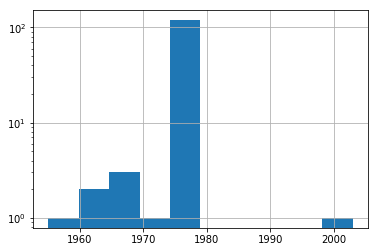

In [41]:
data_squares.query('KitchenSquare == 0 & HouseYear < 2005')['HouseYear'].hist(log=True)

In [42]:
data_squares.query('KitchenSquare == 0 & HouseYear < 2005')['HouseYear'].value_counts()

1977    118
2003      1
1975      1
1974      1
1968      1
1966      1
1965      1
1962      1
1961      1
1955      1
Name: HouseYear, dtype: int64

Получили интересное наблюдение - все квартиры, удовлетворяющие условиям студий старше 2005 года, однако есть квартиры старше. И них особенно выделяются квартиры 1977 года, в которых площадь равна жилой площади и кухня равна 0.  
Это может быть связано с недобросовестностью оператора (сейчас или ранее), либо говорит о том, что по этому году нет статистики по кухням и реестры заполнялись подобным образом.  
Рассмотрим все постройки 1977 года и примем решение - исключить их или попробовать привести к средним значениям (для  упрщения квартиры не 1977 года будем считать по правилам 1977).

In [43]:
data_squares.loc[(data_squares['HouseYear'] == 1977)].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,786.000000,786.000000,786.000000,786.0
mean,58.613255,44.112740,3.992366,1977.0
std,18.798904,25.959177,8.128267,0.0
min,27.264870,1.104689,0.000000,1977.0
25%,43.529703,27.579919,1.000000,1977.0
50%,56.655886,42.280540,1.000000,1977.0
75%,66.840118,60.817431,7.000000,1977.0
max,163.495331,164.526764,197.000000,1977.0


In [44]:
data_squares.loc[(data_squares['HouseYear'] == 1977) & (data_squares['KitchenSquare'] == 43)]

,Square,LifeSquare,KitchenSquare,HouseYear
1864,138.98082,138.004593,43.0,1977


In [45]:
data_squares.loc[(data_squares['HouseYear'] == 1977) & (data_squares['KitchenSquare'] <= 1)].info()
# / data_squares.loc[(data_squares['HouseYear'] == 1977) & (data_squares['KitchenSquare'] > 1)].count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 14 to 9925
Data columns (total 4 columns):
Square           484 non-null float32
LifeSquare       484 non-null float32
KitchenSquare    484 non-null float64
HouseYear        484 non-null int64
dtypes: float32(2), float64(1), int64(1)
memory usage: 15.1 KB


In [46]:
data_squares.loc[(data_squares['HouseYear'] == 1977) & (data_squares['KitchenSquare'] > 1)].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,302.000000,302.000000,302.000000,302.0
mean,55.753582,37.773655,9.178808,1977.0
std,18.004402,19.803400,11.321685,0.0
min,29.721867,1.626502,4.000000,1977.0
25%,42.089705,22.946529,6.000000,1977.0
50%,53.025328,34.011335,8.000000,1977.0
75%,64.611103,45.502169,10.000000,1977.0
max,163.495331,161.504227,197.000000,1977.0


Данных достаточно для вычисления доли кухни от общей площади

In [47]:
kitchen1977_rate = data_squares.loc[(data_squares['HouseYear'] < 2005) & 
                                (data_squares['KitchenSquare'] > 1)]['KitchenSquare'].mean()
kitchen1977_rate = kitchen1977_rate \
/ data_squares.loc[(data_squares['HouseYear'] < 2005) & 
                                (data_squares['KitchenSquare'] > 1)]['Square'].mean()
kitchen1977_rate

0.14202271650343015

In [48]:
new_kitchen1977_square = np.round(data_squares.loc[(data_squares['HouseYear'] < 2005) & 
                                (data_squares['KitchenSquare'] <= 1)]['Square'] * kitchen1977_rate)
data_squares.loc[(data_squares['HouseYear'] < 2005) & (data_squares['KitchenSquare'] <= 1), 'KitchenSquare'] \
= new_kitchen1977_square

In [49]:
data_squares.loc[(data_squares['HouseYear'] < 2005)].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,5925.000000,5925.000000,5925.000000,5925.000000
mean,52.808796,34.079357,7.499072,1976.672574
std,16.529871,16.231916,3.283870,13.176020
min,16.117155,1.104689,2.000000,1910.000000
25%,40.352005,22.662954,6.000000,1968.000000
50%,48.328720,31.533701,8.000000,1977.000000
75%,62.151382,42.475040,9.000000,1984.000000
max,183.382278,461.463623,197.000000,2004.000000


Теперь мы можем найти аномально маленькие кухни и подтянуть их до средних значений  
Исключим из расчетов кухни с площадью 0 и меньше 4 метров (по ГОСТ меньше не строили)

In [50]:
kitchen_rate = np.mean(data_squares.loc[(data_squares['KitchenSquare'] >= 4)]['KitchenSquare']
                      / data_squares.loc[(data_squares['KitchenSquare'] >= 4)]['Square'])
kitchen_rate

0.15378550754589915

In [51]:
data_squares.loc[(data_squares['KitchenSquare'] != 0) & 
                                (data_squares['KitchenSquare'] < 4)]

,Square,LifeSquare,KitchenSquare,HouseYear
28,42.530045,43.967758,1.0,2014
74,63.184422,61.142895,1.0,2016
76,47.909328,42.782387,1.0,2016
95,61.334969,4.091945,1.0,2014
108,62.224567,58.503986,1.0,2016
119,42.367290,40.012527,1.0,2015
123,85.952309,89.803749,1.0,2017
129,65.102020,64.622604,1.0,2015
153,51.831474,53.491302,1.0,2015
184,48.743664,51.011230,1.0,2017


In [52]:
kitchen_index = data_squares.loc[(data_squares['KitchenSquare'] != 0) & 
                                (data_squares['KitchenSquare'] < 4), 'KitchenSquare'].index

new_kitchen_square = np.round(data_squares.loc[(data_squares['KitchenSquare'] != 0) & 
                                (data_squares['KitchenSquare'] < 4)]['Square'] * kitchen_rate)

data_squares.loc[(data_squares['KitchenSquare'] != 0) & 
                                (data_squares['KitchenSquare'] < 4), 'KitchenSquare'] = new_kitchen_square

data_squares.loc[kitchen_index]

,Square,LifeSquare,KitchenSquare,HouseYear
28,42.530045,43.967758,7.0,2014
74,63.184422,61.142895,10.0,2016
76,47.909328,42.782387,7.0,2016
95,61.334969,4.091945,9.0,2014
108,62.224567,58.503986,10.0,2016
119,42.367290,40.012527,7.0,2015
123,85.952309,89.803749,13.0,2017
129,65.102020,64.622604,10.0,2015
153,51.831474,53.491302,8.0,2015
184,48.743664,51.011230,7.0,2017


In [53]:
data_squares.query('0 < KitchenSquare < 4')

,Square,LifeSquare,KitchenSquare,HouseYear
1888,17.498543,13.446544,3.0,1961
3081,20.213127,13.800282,3.0,1974
3789,18.509176,15.170851,3.0,1970
4113,20.924927,10.651456,3.0,1968
4359,22.691542,13.499648,3.0,1972
6046,20.606762,14.740085,3.0,1975
6984,22.682705,14.664334,3.0,1969
7685,21.121279,15.202620,3.0,1964
7758,16.117155,8.822989,2.0,1965
7888,18.983963,11.419796,3.0,1967


И последний штрих с кухнями - довести метраж до 4  
И кухню с метражем 197 квюметров усреднить

In [54]:
data_squares.loc[(data_squares['KitchenSquare'] > 0) & (data_squares['KitchenSquare'] < 4), 'KitchenSquare'] = 4
data_squares.loc[(data_squares['KitchenSquare'] == 197), 'KitchenSquare'] = \
    data_squares.loc[(data_squares['KitchenSquare'] == 197), 'Square'] * kitchen_rate

In [55]:
data_squares.loc[(data_squares['KitchenSquare'] != 0)].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,7772.000000,7772.000000,7772.000000,7772.000000
mean,55.188221,36.010033,8.091478,1985.314720
std,20.183336,19.879385,2.673552,19.393401
min,16.117155,0.795539,4.000000,1910.000000
25%,41.171394,22.739079,6.000000,1970.000000
50%,50.697559,32.657097,8.000000,1979.000000
75%,64.592503,44.912235,10.000000,2004.000000
max,641.065186,638.163208,43.000000,2020.000000


Обратим внимание на студии. Есть такие, у которых жилая площадь превышает общую. Скорее всего это превышение ни что иное как разного рода технические помещения - их надо учесть в общей площади, соответственно сократив жилую

In [56]:
def get_overcount(df, query, columns):
    part_more_total = df.query(query)[columns]
    part_more_total['Overcount'] = np.abs(part_more_total[columns[0]] - part_more_total[columns[1]])
    part_more_total[f'{columns[1]}_r'] = part_more_total[columns[0]] - part_more_total['Overcount']
    return part_more_total    

In [57]:
data_squares_stud = get_overcount(data_squares, 'KitchenSquare == 0 & LifeSquare > Square', 
                                 ['Square', 'LifeSquare'])

data_squares.loc[data_squares_stud.index, 'LifeSquare'] = data_squares_stud['LifeSquare_r']
data_squares.loc[(data_squares['KitchenSquare'] == 0)].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,102.000000,102.000000,102.0,102.000000
mean,65.214249,57.883526,0.0,2016.176471
std,27.926983,32.383766,0.0,1.900556
min,27.778509,1.185864,0.0,2008.000000
25%,45.170555,39.108806,0.0,2015.000000
50%,61.203308,52.739094,0.0,2016.000000
75%,74.232384,72.021124,0.0,2017.000000
max,212.932358,211.231125,0.0,2019.000000


In [58]:
data_squares.loc[(data_squares['KitchenSquare'] == 0) & 
                  (data_squares['HouseYear'] > 2005) & 
                  (data_squares['LifeSquare'] < data_squares['Square'] * 0.9)]

,Square,LifeSquare,KitchenSquare,HouseYear
338,50.390862,41.642899,0.0,2008
616,59.732433,53.157295,0.0,2017
1578,59.715763,1.595943,0.0,2018
2174,63.481407,37.626678,0.0,2016
3042,40.288834,1.487210,0.0,2016
3427,70.916481,36.236492,0.0,2014
4751,40.490421,4.114601,0.0,2019
4892,73.059242,3.769436,0.0,2016
5048,38.936985,3.064320,0.0,2017
5976,65.620926,1.819046,0.0,2015


In [59]:
tech_mean = np.mean(data_squares_stud['Overcount'] / data_squares_stud['Square'])
tech_mean

0.030018096789717674

Выше приведены очевидные квартиры-студии с не верно заполненной жилой площадью.  
Далее выведен средний коэффициент технических помещений в подобных квартирах.  
Теперь приведем их жилую площадь к средней

In [60]:
data_squares.loc[(data_squares['KitchenSquare'] == 0) & 
                  (data_squares['HouseYear'] > 2005) & 
                  (data_squares['LifeSquare'] < data_squares['Square'] * 0.9), 'LifeSquare'] = \
    data_squares.loc[(data_squares['KitchenSquare'] == 0) & 
                  (data_squares['HouseYear'] > 2005) & 
                  (data_squares['LifeSquare'] < data_squares['Square'] * 0.9), 'Square'] * (1 - tech_mean)

Аналогичная ситуация может быть и с обычными квартирами.

In [61]:
life_more_total = get_overcount(data_squares, 'LifeSquare > Square', ['Square', 'LifeSquare', 'KitchenSquare'])
life_more_total.describe()

,Square,LifeSquare,KitchenSquare,Overcount,LifeSquare_r
count,438.000000,438.000000,438.000000,438.000000,438.000000
mean,59.564934,62.839928,8.920091,3.274967,56.289986
std,28.663197,36.052010,3.128888,21.785913,35.953594
min,16.547241,16.698570,4.000000,0.013302,-305.344971
25%,40.917448,42.277786,6.000000,0.659949,39.448858
50%,54.067722,56.195995,9.000000,1.447269,52.205051
75%,68.671125,71.575228,10.000000,2.407933,67.809303
max,409.425171,461.463623,26.000000,383.404297,408.210602


438 квартир имеют аномальную жилую площадь. Так же наблюдаются выбросы. Предположим, что под разного рода технические помещения выделяется не более 4 метров (среднее значение 3,27)

In [62]:
life_more_total.query('Overcount > 4')

,Square,LifeSquare,KitchenSquare,Overcount,LifeSquare_r
589,48.449875,263.542023,5.0,215.092148,-166.642273
1312,42.357697,46.520149,5.0,4.162453,38.195244
1507,52.534283,56.961781,8.0,4.427498,48.106785
1990,64.061829,68.788239,10.0,4.726410,59.335419
2003,37.759975,41.847858,6.0,4.087883,33.672092
2731,96.043564,100.982132,10.0,4.938568,91.104996
2751,58.744030,62.923073,9.0,4.179043,54.564987
4204,38.049225,42.672680,10.0,4.623455,33.425770
4272,79.130547,83.470009,12.0,4.339462,74.791084
4490,87.003433,91.378548,13.0,4.375114,82.628319


Очевидно, что данные с Id 589, 6324, 8426 - это ошибка оператора и сокращение значения жилой площади в 10 раз не противоречит логике. Остальные значения удовлетворяют здравому смыслу и могут быть техническими помешениями.

In [63]:
data_squares.loc[[589, 6324, 8426], 'LifeSquare'] = data_squares.loc[[589, 6324, 8426], 'LifeSquare'] / 10

In [64]:
life_more_total = get_overcount(data_squares, 'LifeSquare > Square', ['Square', 'LifeSquare', 'KitchenSquare'])
data_squares.loc[life_more_total.index, 'LifeSquare'] = life_more_total['LifeSquare_r']
data_squares.loc[life_more_total.index].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,435.000000,435.000000,435.000000,435.000000
mean,59.608128,57.987034,8.933333,1998.951724
std,28.715939,28.783115,3.130446,19.758448
min,16.547241,14.056145,4.000000,1958.000000
25%,40.924896,39.677429,6.000000,1977.000000
50%,54.111523,52.313824,9.000000,2014.000000
75%,68.589390,67.952148,10.000000,2017.000000
max,409.425171,408.210602,26.000000,2020.000000


Проверим: есть ли квартиры, у которых кухня включена в жилую площадь (как упоминалось ранее такого быть не должно). Соответственно, если разница между общей площадью и жилой меньше площади кухни, то допущена ошибка и мы уменьшим жилую площадь на площадь кухни.

In [65]:
data_squares.loc[(data_squares['Square'] - data_squares['LifeSquare'] < data_squares['KitchenSquare']), 
                'LifeSquare'] = \
    data_squares.query('Square - LifeSquare < KitchenSquare')['LifeSquare'] - \
    data_squares.query('Square - LifeSquare < KitchenSquare')['KitchenSquare']

Ранее мы предположили, что площадь квартиры не может быть меньше 15 кв.м. Следовательно логично предположить, что жилая площадь не может быть меньше, чем 15 * среднюю долю жилого пространства (data_lifesquare_to_square_mean)

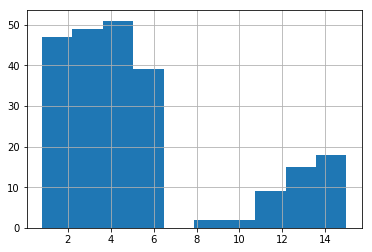

In [67]:
data_squares.query('LifeSquare < 15').LifeSquare.hist()

In [68]:
life_to_square = data_squares.loc[(data_squares['KitchenSquare'] != 0)].copy()
life_to_square.loc[:, 'life_part'] = life_to_square.loc[:, 'LifeSquare'] / life_to_square.loc[:, 'Square']
life_to_square.describe()

,Square,LifeSquare,KitchenSquare,HouseYear,life_part
count,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,55.188221,34.386749,8.091478,1985.314720,0.617358
std,20.183336,17.070370,2.673552,19.393401,0.136294
min,16.117155,0.795539,4.000000,1910.000000,0.012510
25%,41.171394,22.693111,6.000000,1970.000000,0.555287
50%,50.697559,32.145769,8.000000,1979.000000,0.615877
75%,64.592503,43.681505,10.000000,2004.000000,0.689570
max,641.065186,628.163208,43.000000,2020.000000,0.979874


In [69]:
life_to_square.loc[(life_to_square['LifeSquare'] < 15 * 0.617358)]

,Square,LifeSquare,KitchenSquare,HouseYear,life_part
95,61.334969,4.091945,9.0,2014,0.066715
134,65.496674,5.589324,9.0,1977,0.085338
158,51.991066,4.896202,7.0,1977,0.094174
160,66.419838,3.987101,9.0,1977,0.060029
269,46.692974,5.941401,7.0,2015,0.127244
278,79.521217,4.634048,12.0,2017,0.058274
362,44.171791,1.251846,7.0,2017,0.028340
474,64.049698,4.008230,10.0,2017,0.062580
476,63.419552,2.286357,9.0,1977,0.036051
526,53.733677,4.323046,8.0,2015,0.080453


In [70]:
np.mean(life_to_square.loc[(life_to_square['LifeSquare'] < 15 * 0.617358), 'LifeSquare'] * \
10 / life_to_square.loc[(life_to_square['LifeSquare'] < 15 * 0.617358), 'Square'])

0.6963508129119873

Исходя из полученных данных, получается:  
 - средняя жилая площадь около 62%  
 - для квартир с жилой площадью, меньше предположенной минимальной (15 * 62%), скорее всего была допущена ошибка при занесении данных. А именно - ошибочно поставленна точка. Таким образом, при умножении на 10 мы получили значеня близкие к среднему - 69% от общей площади  

Принимаем решение сделать жилую площадь таких квартир равную 62% от общей

In [71]:
life_to_square.loc[(life_to_square['LifeSquare'] < 15 * 0.617358), 'LifeSquare'] = \
    life_to_square.loc[(life_to_square['LifeSquare'] < 15 * 0.617358), 'Square'] * 0.62

In [72]:
data_squares.loc[life_to_square.index, 'LifeSquare'] = life_to_square['LifeSquare']

Теперь наш датасет площадей "data_squares" (data без NaN значений) приведен к логичному виду без явных аномалий. 

In [73]:
data_squares.loc[data_squares['KitchenSquare'] == 0].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,102.000000,102.000000,102.0,102.000000
mean,65.214249,63.309669,0.0,2016.176471
std,27.926983,27.800159,0.0,1.900556
min,27.778509,26.438013,0.0,2008.000000
25%,45.170555,43.493052,0.0,2015.000000
50%,61.203308,58.508202,0.0,2016.000000
75%,74.232384,73.247286,0.0,2017.000000
max,212.932358,211.231125,0.0,2019.000000


In [74]:
data_squares.loc[data_squares['KitchenSquare'] != 0].describe()

,Square,LifeSquare,KitchenSquare,HouseYear
count,7772.000000,7772.000000,7772.000000,7772.000000
mean,55.188221,35.196644,8.091478,1985.314720
std,20.183336,16.470882,2.673552,19.393401
min,16.117155,9.992637,4.000000,1910.000000
25%,41.171394,23.271070,6.000000,1970.000000
50%,50.697559,32.474901,8.000000,1979.000000
75%,64.592503,43.986254,10.000000,2004.000000
max,641.065186,628.163208,43.000000,2020.000000


Заменим значения площадей в оригинальном датасете

In [75]:
data.loc[data_squares.index, ['Square', 'LifeSquare', 'KitchenSquare', 'HouseYear']] = data_squares

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 19 columns):
Id               9987 non-null uint16
DistrictId       9987 non-null uint8
Rooms            9987 non-null float32
Square           9987 non-null float32
LifeSquare       7874 non-null float32
KitchenSquare    9987 non-null float32
Floor            9987 non-null uint8
HouseFloor       9987 non-null float32
HouseYear        9987 non-null int64
Ecology_1        9987 non-null float32
Ecology_2        9987 non-null category
Ecology_3        9987 non-null category
Social_1         9987 non-null uint8
Social_2         9987 non-null uint16
Social_3         9987 non-null uint8
Helthcare_2      9987 non-null uint8
Shops_1          9987 non-null uint8
Shops_2          9987 non-null category
Price            9987 non-null float32
dtypes: category(3), float32(7), int64(1), uint16(2), uint8(6)
memory usage: 478.3 KB


In [77]:
data.loc[(data['LifeSquare'].isna())]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312927,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156250
8,5172,1,2.0,64.511436,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.796875
21,11935,27,2.0,64.711838,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,0,1,B,127200.023438
23,6641,54,3.0,118.907608,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,6,6,B,571069.062500
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,244145.828125
27,7550,23,2.0,64.556206,NaN,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,173910.921875
36,11703,23,1.0,41.118767,NaN,1.0,4,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,103510.226562
39,9371,23,2.0,60.503250,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,0,0,B,229778.062500
43,175,23,2.0,58.692131,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,184501.015625
46,1821,23,2.0,49.929489,NaN,1.0,9,12.0,1977,0.034656,B,B,0,168,0,0,0,B,88464.421875


Можно их удалить или произвести замену.  
Решено произвести замену на среднюю долю от общей площади  


In [78]:

data_lifesquare_to_square = data.loc[(data['LifeSquare'].notna()), ['Square', 'LifeSquare']]
data_lifesquare_to_square['part_ls_to_s'] = data_lifesquare_to_square['LifeSquare'] \
                                            / data_lifesquare_to_square['Square']
data_lifesquare_to_square_mean = data_lifesquare_to_square['part_ls_to_s'].mean()
data_lifesquare_to_square_mean

0.6350383162498474

In [79]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Square'] * data_lifesquare_to_square_mean)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 19 columns):
Id               9987 non-null uint16
DistrictId       9987 non-null uint8
Rooms            9987 non-null float32
Square           9987 non-null float32
LifeSquare       9987 non-null float32
KitchenSquare    9987 non-null float32
Floor            9987 non-null uint8
HouseFloor       9987 non-null float32
HouseYear        9987 non-null int64
Ecology_1        9987 non-null float32
Ecology_2        9987 non-null category
Ecology_3        9987 non-null category
Social_1         9987 non-null uint8
Social_2         9987 non-null uint16
Social_3         9987 non-null uint8
Helthcare_2      9987 non-null uint8
Shops_1          9987 non-null uint8
Shops_2          9987 non-null category
Price            9987 non-null float32
dtypes: category(3), float32(7), int64(1), uint16(2), uint8(6)
memory usage: 478.3 KB


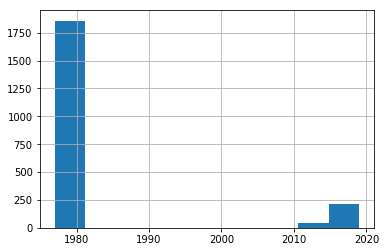

In [97]:
data_na_frame = data.loc[(set(data.index) - set(data_lifesquare_to_square.index))].copy()
data_na_frame['HouseYear'].hist()

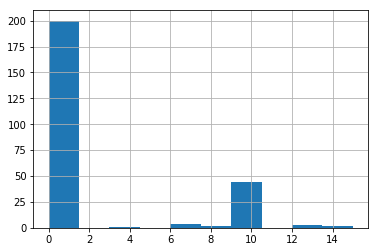

In [100]:
data_na_frame.query('HouseYear > 2010')['KitchenSquare'].hist()

In [101]:
data_na_frame.query('HouseYear > 2010')['KitchenSquare'].describe()

count    256.000000
mean       2.882812
std        3.760722
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       15.000000
Name: KitchenSquare, dtype: float64